In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [2]:
df_ns2=pd.read_csv('KiKNet_smoothFAS_updated_28Dec20_NS2.csv')
df_ew2=pd.read_csv('KiKNet_smoothFAS_updated_28Dec20_EW2.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=df_ns2[['MT_Magnitude_','rjb_0','Vs30','D5_75_NS2','D20_80_NS2','D5_95_NS2','D5_75_EW2','D20_80_EW2','D5_95_EW2']]

In [5]:
from scipy import stats
df['_5_75']=stats.gmean(df.loc[:,['D5_75_EW2','D5_75_NS2']], axis=1)
df['_20_80']=stats.gmean(df.loc[:,['D20_80_EW2','D20_80_NS2']], axis=1)
df['_5_95']=stats.gmean(df.loc[:,['D5_95_EW2','D5_95_NS2']], axis=1)

C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [6]:
df=df.reset_index()
df.shape

(59011, 13)

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df

,index,MT_Magnitude_,rjb_0,Vs30,D5_75_NS2,D20_80_NS2,D5_95_NS2,D5_75_EW2,D20_80_EW2,D5_95_EW2,_5_75,_20_80,_5_95
0,0,5.0,201.366205,241.153846,18.755,17.205,32.665,15.670,14.035,30.665,17.143245,15.539375,31.649206
1,1,5.0,212.569993,301.324503,25.350,11.890,39.275,26.860,12.985,41.555,26.094080,12.425444,40.398919
2,2,5.0,160.594546,428.100722,19.135,5.295,25.105,4.320,3.665,9.920,9.091930,4.405244,15.781052
3,3,5.0,195.256405,448.533640,26.155,6.425,33.085,15.705,4.245,21.410,20.267320,5.222463,26.614843
4,4,5.0,220.505360,274.027568,31.625,10.610,43.535,28.405,11.245,42.955,29.971789,10.922887,43.244028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59006,59006,3.6,48.584792,371.462264,4.490,3.750,13.260,3.460,1.760,9.290,3.941497,2.569047,11.098892
59007,59007,3.6,70.884798,328.979157,5.600,6.870,17.760,6.520,6.360,19.840,6.042516,6.610083,18.771212
59008,59008,3.6,52.028046,343.678161,4.810,5.460,15.090,5.640,6.250,18.750,5.208493,5.841661,16.820746
59009,59009,3.6,34.276865,573.596358,2.530,2.600,8.140,3.940,4.190,11.120,3.157246,3.300606,9.514032


In [9]:
df.loc[(df['MT_Magnitude_'] == 5.1)&(df['rjb_0'] > 200)&(df['rjb_0'] < 210)]

,index,MT_Magnitude_,rjb_0,Vs30,D5_75_NS2,D20_80_NS2,D5_95_NS2,D5_75_EW2,D20_80_EW2,D5_95_EW2,_5_75,_20_80,_5_95
474,474,5.1,208.909603,372.133011,28.450,19.62,47.570,27.130,20.100,44.400,27.782162,19.858550,45.957676
1136,1136,5.1,201.085232,717.217871,11.080,7.17,27.390,11.620,9.075,29.710,11.346788,8.066458,28.526425
1163,1163,5.1,200.237120,518.251273,7.690,9.02,34.220,9.655,11.555,40.005,8.616667,10.209118,36.999609
1207,1207,5.1,200.944591,403.846154,3.900,3.35,13.465,3.820,3.180,7.855,3.859793,3.263893,10.284336
3193,3193,5.1,207.087101,369.230769,9.675,8.83,15.830,8.600,9.300,18.510,9.121677,9.061953,17.117631
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58673,58673,5.1,202.095837,371.058679,14.640,10.51,31.700,14.800,9.220,29.530,14.719783,9.843892,30.595768
58675,58675,5.1,206.392503,416.748768,10.450,10.51,55.260,10.960,11.460,55.400,10.701962,10.974726,55.329956
58681,58681,5.1,207.024353,933.962264,13.430,9.28,27.710,12.140,8.640,24.000,12.768720,8.954284,25.788369
58710,58710,5.1,201.852632,705.445545,8.220,5.85,15.930,8.230,6.180,15.560,8.224998,6.012736,15.743913


In [10]:
df['MT_Magnitude_'].max()
df['rjb_0'].max()

299.968812

In [11]:
input_var=df[['MT_Magnitude_','rjb_0']]
input_var

,MT_Magnitude_,rjb_0
0,5.0,201.366205
1,5.0,212.569993
2,5.0,160.594546
3,5.0,195.256405
4,5.0,220.505360
...,...,...
59006,3.6,48.584792
59007,3.6,70.884798
59008,3.6,52.028046
59009,3.6,34.276865


In [12]:
y_var=df[['_5_75']]
y_var=np.log(y_var)
y_var=np.array(y_var)
y_var


array([[2.84160422],
       [3.26170846],
       [2.20738726],
       ...,
       [1.65029057],
       [1.14970001],
       [1.63266019]])

In [13]:
X_train, X_test, y_train, y_test=train_test_split(input_var,y_var,test_size=0.2,random_state=2)

In [14]:
mean_mag=X_train[['MT_Magnitude_']].mean()
std_mag=X_train[['MT_Magnitude_']].std()

mean_dis=X_train[['rjb_0']].mean()
std_dis=X_train[['rjb_0']].std()

print(mean_mag)
print(std_mag)

print(mean_dis)
print(std_dis)

MT_Magnitude_    4.536197
dtype: float64
MT_Magnitude_    0.769804
dtype: float64
rjb_0    113.709563
dtype: float64
rjb_0    67.130284
dtype: float64


In [15]:
X_train=preprocessing.scale(X_train)
X_train

array([[ 0.21278805, -1.09723007],
       [-0.43673527, -0.81643295],
       [ 0.08288338,  0.26813339],
       ...,
       [-0.43673527, -0.23729237],
       [-0.43673527, -0.06117202],
       [ 1.771644  , -0.06135486]])

In [16]:
X_test['MT_Magnitude_']=(X_test['MT_Magnitude_']-4.536197)/0.769804
X_test['rjb_0']=(X_test['rjb_0']-113.709563)/67.130284

C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dev\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
X_test=np.array(X_test)

In [18]:
from tensorflow.keras.optimizers import Adam

In [19]:
model1=Sequential([Dense(units=5, input_shape=(2,), activation='relu'),
                 
                  Dense(units=1, activation='linear')
                 ])

In [20]:
model1.compile(optimizer=Adam(learning_rate=.01),loss='mean_squared_error')

Train on 38733 samples, validate on 4304 samples
Epoch 1/15
38733/38733 [==============================] - 1s 23us/step - loss: 0.6316 - val_loss: 0.4517
Epoch 2/15
38733/38733 [==============================] - 1s 22us/step - loss: 0.4229 - val_loss: 0.4495
Epoch 3/15
38733/38733 [==============================] - 1s 22us/step - loss: 0.4189 - val_loss: 0.4312
Epoch 4/15
38733/38733 [==============================] - 1s 22us/step - loss: 0.4169 - val_loss: 0.4275
Epoch 5/15
38733/38733 [==============================] - 1s 22us/step - loss: 0.4167 - val_loss: 0.4280
Epoch 6/15
38733/38733 [==============================] - 1s 21us/step - loss: 0.4164 - val_loss: 0.4366
Epoch 7/15
38733/38733 [==============================] - 1s 21us/step - loss: 0.4153 - val_loss: 0.4302
Epoch 8/15
38733/38733 [==============================] - 1s 22us/step - loss: 0.4159 - val_loss: 0.4253
Epoch 9/15
38733/38733 [==============================] - 1s 21us/step - loss: 0.4154 - val_loss: 0.4426
Epoch 

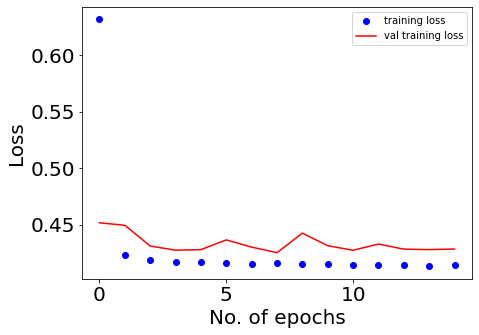

In [21]:
history=model1.fit(X_train, y_train,batch_size=64, epochs=15, validation_split=0.1, verbose=1)
history_dict=history.history
    
loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure(figsize=(7,5))

plt.plot(loss_values, 'bo', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend(fontsize=10)


plt.ylabel('Loss' ,fontsize=20)
plt.xlabel('No. of epochs', fontsize=20)


plt.tick_params(axis='both', which='major', labelsize=20)


In [22]:
y_train_pred=model1.predict(X_train)
y_test_pred=model1.predict(X_test)

print('R2 score on train set is :\t{:0.3f}'.format(r2_score(y_train, y_train_pred)))
print('R2 score on test set is :\t{:0.3f}'.format(r2_score(y_test, y_test_pred)))

R2 score on train set is :	0.405
R2 score on test set is :	0.409


Text(0.5, 1.0, 'Duration 5-75')

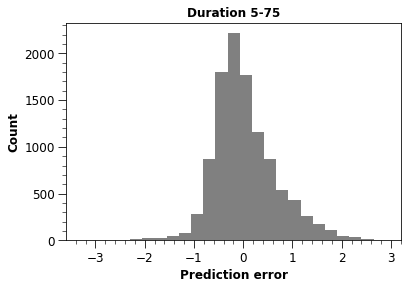

In [23]:
error=y_test_pred-y_test

plt.figure(figsize=(6,4))

plt.hist(error, bins=25, color='grey')

plt.xlabel('Prediction error',fontsize=12,weight='bold')
plt.ylabel('Count',fontsize=12,weight='bold')
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.tick_params(axis='both', which='minor', labelsize=8, length=4)
plt.minorticks_on()
plt.title('Duration 5-75', fontsize=12,weight='bold')

In [24]:
X_data=np.array(preprocessing.scale(input_var))
X_data

array([[ 0.60218713,  1.30029062],
       [ 0.60218713,  1.46695887],
       [ 0.60218713,  0.69376887],
       ...,
       [-1.21555841, -0.9212732 ],
       [-1.21555841, -1.18534087],
       [-1.21555841, -0.95412353]])

In [25]:
y_pred=model1.predict(X_data)
y_pred

array([[2.7133994],
       [2.7152004],
       [2.7068462],
       ...,
       [1.9274015],
       [1.5033519],
       [1.9153514]], dtype=float32)

In [26]:
output_y=df[['_5_75']]
output_y=np.log(output_y)
output_y

,_5_75
0,2.841604
1,3.261708
2,2.207387
3,3.009010
4,3.400257
...,...
59006,1.371561
59007,1.798820
59008,1.650291
59009,1.149700


In [27]:
residual=output_y-y_pred
residual.max()

_5_75    3.658012
dtype: float64

In [28]:
mag=input_var['MT_Magnitude_']
dis=input_var['rjb_0']


In [29]:
calc=pd.concat([mag,dis,residual], axis=1)
calc.shape

(53797, 3)

In [30]:
a=[]
for i in np.arange(3.5,7.5,0.5):
    b=calc[(calc.MT_Magnitude_ >= i ) & (calc.MT_Magnitude_ <=i+0.5)]._5_75.mean()
    a.append(b)
    
a=np.array(a)
a


array([-0.04902382, -0.05367536, -0.05981916,  0.02844659,  0.0512692 ,
        0.04647665,  0.00178544,  0.06146017])

In [31]:
from numpy import arange
c=[]
for i in arange(3.5,7.5,0.5):
    c.append(i)

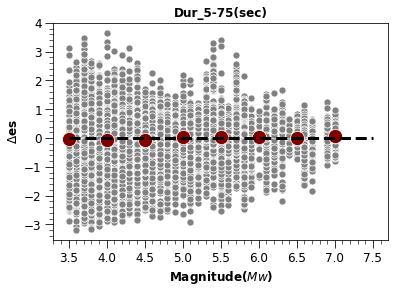

In [32]:
x=input_var['MT_Magnitude_']
y=residual['_5_75']
plt.figure(figsize=(6,4))
plt.hlines(y=0,xmin=3.5, xmax=7.5,color='k',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='grey', s=50)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('$\Delta$es', size=12, weight='bold')
plt.xlabel('Magnitude($Mw$)', size=12,weight='bold')
#plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=12,length=8)
plt.title('Dur_5-75(sec)',weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)


In [33]:
ba=[]
for i in np.arange(0,300,25):
    b=calc[(calc.rjb_0 >= i ) & (calc.rjb_0 <=i+25)]._5_75.mean()
    a.append(b)
    
a=np.array(a)
a


array([-0.14193875, -0.01381733, -0.05557101, -0.01709979, -0.02814552,
       -0.07785914, -0.08644383, -0.01799039,  0.03764083,  0.07635226,
        0.12761713,  0.15930643])

In [34]:
c=[]
for i in range(0,300,25):
    c.append(i)
c    

[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275]

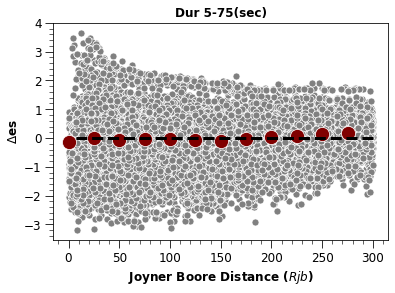

In [35]:
x=input_var['rjb_0']
y=residual['_5_75']
plt.figure(figsize=(6,4))
plt.hlines(y=0,xmin=300, xmax=7.5,color='k',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='grey', s=50)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('$\Delta$es', size=12, weight='bold')

plt.xlabel('Joyner Boore Distance ($Rjb$)', size=12, weight='bold')
#plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.title('Dur 5-75(sec)',weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)

In [36]:
df1=pd.read_csv('borehole_data.csv')
df1.isnull().any()
df1.shape

(52251, 12)

In [37]:
input_var=df1[['MT_Magnitude_','rjb_0']]

In [38]:
y_var=df1[['_5_75']]
y_var=np.log(y_var)
y_var=np.array(y_var)
y_var

array([[2.46357684],
       [3.56820481],
       [3.84694415],
       ...,
       [1.56325525],
       [1.69296065],
       [1.51338528]])

In [39]:
X_train, X_test, y_train, y_test=train_test_split(input_var,y_var,test_size=0.2,random_state=2)

In [40]:
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

In [41]:
from tensorflow.keras.optimizers import Adam

In [42]:
model2=Sequential([Dense(units=5, input_shape=(2,), activation='relu'),
                 
                  Dense(units=1, activation='linear')
                 ])

In [43]:
model2.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')

Train on 37620 samples, validate on 4180 samples
Epoch 1/20
37620/37620 [==============================] - 0s 13us/step - loss: 0.9936 - val_loss: 0.4093
Epoch 2/20
37620/37620 [==============================] - 0s 12us/step - loss: 0.4076 - val_loss: 0.3921
Epoch 3/20
37620/37620 [==============================] - 0s 12us/step - loss: 0.3970 - val_loss: 0.3866
Epoch 4/20
37620/37620 [==============================] - 0s 13us/step - loss: 0.3929 - val_loss: 0.3825
Epoch 5/20
37620/37620 [==============================] - 0s 11us/step - loss: 0.3915 - val_loss: 0.3826
Epoch 6/20
37620/37620 [==============================] - 0s 12us/step - loss: 0.3911 - val_loss: 0.3810
Epoch 7/20
37620/37620 [==============================] - 0s 11us/step - loss: 0.3908 - val_loss: 0.3841
Epoch 8/20
37620/37620 [==============================] - 0s 11us/step - loss: 0.3921 - val_loss: 0.3819
Epoch 9/20
37620/37620 [==============================] - 0s 12us/step - loss: 0.3921 - val_loss: 0.3803
Epoch 

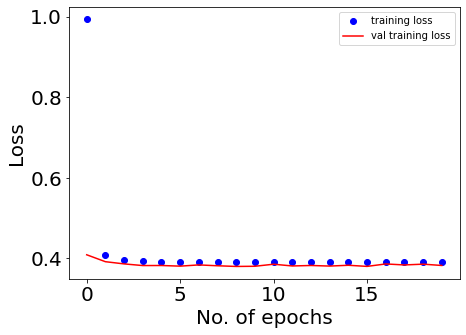

In [44]:
history=model2.fit(X_train, y_train,batch_size=128, epochs=20, validation_split=0.1, verbose=1)
history_dict=history.history
    
loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure(figsize=(7,5))

plt.plot(loss_values, 'bo', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend(fontsize=10)


plt.ylabel('Loss' ,fontsize=20)
plt.xlabel('No. of epochs', fontsize=20)


plt.tick_params(axis='both', which='major', labelsize=20)


In [45]:
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

print('R2 score on train set is :\t{:0.3f}'.format(r2_score(y_train, y_train_pred)))
print('R2 score on test set is :\t{:0.3f}'.format(r2_score(y_test, y_test_pred)))

R2 score on train set is :	0.462
R2 score on test set is :	0.464


Text(0.5, 1.0, 'Duration 5-75(Borehole)')

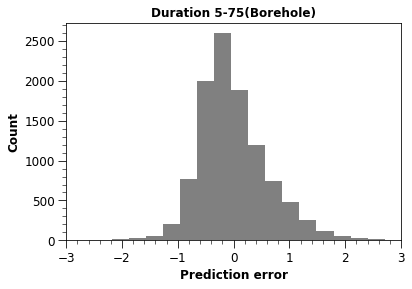

In [46]:
error=y_test_pred-y_test

plt.figure(figsize=(6,4))

plt.hist(error, bins=25, color='grey')

plt.xlabel('Prediction error',fontsize=12,weight='bold')
plt.xlim(-3,3)
plt.ylabel('Count',fontsize=12,weight='bold')
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.tick_params(axis='both', which='minor', labelsize=8, length=4)
plt.minorticks_on()
plt.title('Duration 5-75(Borehole)', fontsize=12,weight='bold')

In [47]:
X_data=np.array(preprocessing.scale(input_var))
X_data

array([[ 0.58977663,  1.76886648],
       [ 2.1410688 ,  1.37557327],
       [ 2.1410688 ,  1.58582329],
       ...,
       [-1.22006423, -0.92183128],
       [-1.22006423, -1.18504777],
       [-1.22006423, -0.95457571]])

In [48]:
y_pred=model2.predict(X_data)
y_pred

array([[2.8455493],
       [3.3587205],
       [3.4446912],
       ...,
       [1.8611755],
       [1.4706688],
       [1.8530238]], dtype=float32)

In [49]:
output_y=df1[['_5_75']]
output_y=np.log(output_y)
output_y

,_5_75
0,2.463577
1,3.568205
2,3.846944
3,3.676766
4,3.529717
...,...
52246,1.975306
52247,2.291749
52248,1.563255
52249,1.692961


In [50]:
residual=output_y-y_pred
residual.max()

_5_75    4.333695
dtype: float64

In [51]:
mag=input_var['MT_Magnitude_']
dis=input_var['rjb_0']

In [52]:
calc=pd.concat([mag,dis,residual], axis=1)
calc.shape

(52251, 3)

In [53]:
a=[]
for i in np.arange(3.5,7.5,0.5):
    b=calc[(calc.MT_Magnitude_ >= i ) & (calc.MT_Magnitude_ <=i+0.5)]._5_75.mean()
    a.append(b)
    
a=np.array(a)
a


array([ 0.0477798 ,  0.00806935,  0.00105605,  0.02911327, -0.006416  ,
       -0.06437808, -0.20945033, -0.09495523])

In [54]:
from numpy import arange
c=[]
for i in arange(3.5,7.5,0.5):
    c.append(i)

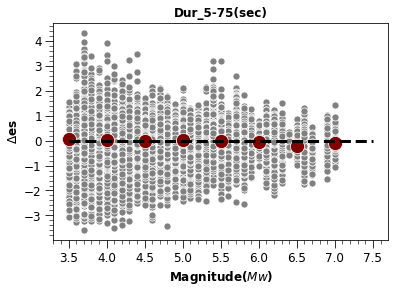

In [55]:
x=input_var['MT_Magnitude_']
y=residual['_5_75']
plt.figure(figsize=(6,4))
plt.hlines(y=0,xmin=3.5, xmax=7.5,color='k',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='grey', s=50)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('$\Delta$es', size=12, weight='bold')
plt.xlabel('Magnitude($Mw$)', size=12,weight='bold')
#plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=12,length=8)
plt.title('Dur_5-75(sec)',weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)


In [56]:
a=[]
for i in np.arange(0,300,25):
    b=calc[(calc.rjb_0 >= i ) & (calc.rjb_0 <=i+25)]._5_75.mean()
    a.append(b)
    
a=np.array(a)
a


array([-0.01267619, -0.0367287 ,  0.01738783,  0.06762172,  0.06005027,
       -0.02516334, -0.03828808, -0.01262368,  0.03822587,  0.03059033,
        0.01835315, -0.00824851])

In [57]:
c=[]
for i in range(0,300,25):
    c.append(i)
c   

[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275]

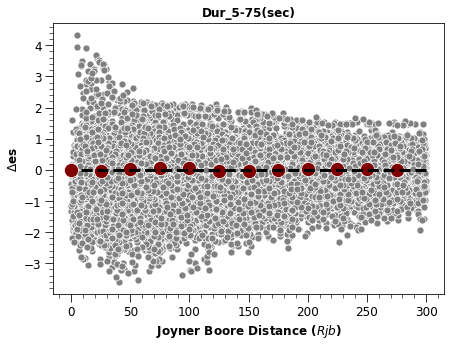

In [58]:
x=input_var['rjb_0']
y=residual['_5_75']
plt.figure(figsize=(7,5))
plt.hlines(y=0,xmin=300, xmax=7.5,color='k',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='o', color='grey', s=50)
sns.scatterplot(c,a, marker='o',s=200,color= 'maroon')
plt.ylabel('$\Delta$es', size=12, weight='bold')
plt.xlabel('Joyner Boore Distance ($Rjb$)', size=12,weight='bold')
#plt.xlim(0,150)

plt.title('Dur_5_75')
plt.tick_params(axis='both', which='major', labelsize=12,length=8)
plt.title('Dur_5-75(sec)',weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)


In [59]:
Mag1=[]
i=0
while i<28:
    Mag1.append(5)
    i+=1
Dis1=[]
for i in range(20,300,10):
    a=i+10
    Dis1.append(a)

In [60]:
Mag1=np.array(Mag1)
Dis1=np.array(Dis1)
li2=[Mag1,Dis1]
df2=pd.DataFrame(li2)
df2=df2.T
df2.columns=['Mag','Dis']
df2

,Mag,Dis
0,5,30
1,5,40
2,5,50
3,5,60
4,5,70
5,5,80
6,5,90
7,5,100
8,5,110
9,5,120


In [61]:
mag=[]
dis=[]

for i in range(0,28):
    mag_new=(Mag1[i]-4.543165)/0.774058
    dis_new=(Dis1[i]-114.286183)/67.408356
    
    mag.append(mag_new)
    dis.append(dis_new)

In [62]:
li3=[mag,dis]
df3=pd.DataFrame(li3)
df3=df3.T
df3.columns=['Mag','Dis']
X_data=np.array(df3)
X_data

array([[ 0.59018187, -1.25038182],
       [ 0.59018187, -1.10203226],
       [ 0.59018187, -0.9536827 ],
       [ 0.59018187, -0.80533314],
       [ 0.59018187, -0.65698358],
       [ 0.59018187, -0.50863402],
       [ 0.59018187, -0.36028446],
       [ 0.59018187, -0.2119349 ],
       [ 0.59018187, -0.06358534],
       [ 0.59018187,  0.08476422],
       [ 0.59018187,  0.23311378],
       [ 0.59018187,  0.38146335],
       [ 0.59018187,  0.52981291],
       [ 0.59018187,  0.67816247],
       [ 0.59018187,  0.82651203],
       [ 0.59018187,  0.97486159],
       [ 0.59018187,  1.12321115],
       [ 0.59018187,  1.27156071],
       [ 0.59018187,  1.41991027],
       [ 0.59018187,  1.56825983],
       [ 0.59018187,  1.71660939],
       [ 0.59018187,  1.86495895],
       [ 0.59018187,  2.01330851],
       [ 0.59018187,  2.16165807],
       [ 0.59018187,  2.31000763],
       [ 0.59018187,  2.4583572 ],
       [ 0.59018187,  2.60670676],
       [ 0.59018187,  2.75505632]])

In [63]:
y_pred1=model1.predict(X_data)
y_pred1=np.exp(y_pred1)
y_pred1.max()

15.244519

In [64]:
y_pred2=model2.predict(X_data)
y_pred2=np.exp(y_pred2)
y_pred2.max()

17.674156

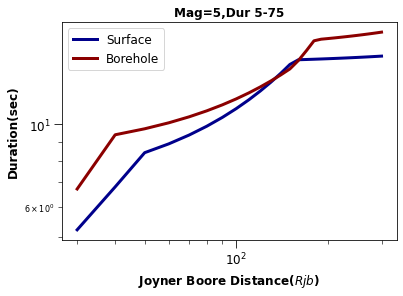

In [65]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(6,4))
plt.xscale('log')
plt.yscale('log')
plt.plot(df2['Dis'],y_pred1, color='darkblue', label='Surface', lw=3)
plt.plot(df2['Dis'],y_pred2, color='darkred',label='Borehole', lw=3)
#plt.axis([10, 1000, 10,100])
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.ylabel('Duration(sec)', size=12,weight='bold')
plt.xlabel('Joyner Boore Distance($Rjb$)', size=12, weight='bold')
plt.title("Mag=5,Dur 5-75",size=12, weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)


In [66]:
Dis2=[]
i=0
while i<6:
    Dis2.append(300)
    i+=1
Mag2=[]
for i in range(2,8):
    a=i+1
    Mag2.append(a)

In [67]:
Mag2=np.array(Mag2)
Dis2=np.array(Dis2)
Mag2
Dis2

array([300, 300, 300, 300, 300, 300])

In [68]:
li4=[Mag2,Dis2]
df4=pd.DataFrame(li4)
df4=df4.T
df4.columns=['Mag','Dis']
df4

,Mag,Dis
0,3,300
1,4,300
2,5,300
3,6,300
4,7,300
5,8,300


In [69]:
mag=[]
dis=[]

for i in range(0,6):
    mag_new=(Mag2[i]-4.543165)/0.774058
    dis_new=(Dis2[i]-114.286183)/67.408356
    
    mag.append(mag_new)
    dis.append(dis_new)

In [70]:
li5=[mag,dis]
df5=pd.DataFrame(li5)
df5=df5.T
df5.columns=['Mag','Dis']
X_data=np.array(df5)
X_data

array([[-1.99360384,  2.75505632],
       [-0.70171098,  2.75505632],
       [ 0.59018187,  2.75505632],
       [ 1.88207473,  2.75505632],
       [ 3.17396758,  2.75505632],
       [ 4.46586044,  2.75505632]])

In [71]:
y_pred1=model1.predict(X_data)
y_pred1=np.exp(y_pred1)
y_pred1.max()

51.73568

In [72]:
y_pred2=model2.predict(X_data)
y_pred2=np.exp(y_pred2)
y_pred2.max()

88.82131

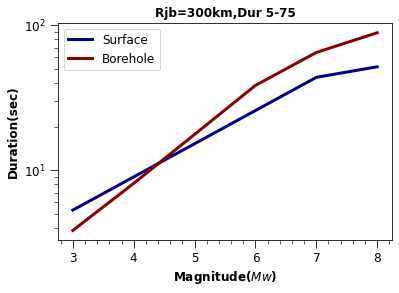

In [73]:
plt.figure(figsize=(6,4))
#plt.xscale('log')
plt.yscale('log')
plt.plot(df4['Mag'],y_pred1, color='darkblue', label='Surface', lw=3)
plt.plot(df4['Mag'],y_pred2, color='darkred',label='Borehole', lw=3)
#plt.axis([10, 1000, 10,100])
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12, length=8)
plt.ylabel('Duration(sec)', size=12,weight='bold')
plt.xlabel('Magnitude($Mw$)', size=12, weight='bold')
plt.title("Rjb=300km,Dur 5-75",size=12, weight='bold')
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', labelsize=8,length=4)
